In [ ]:
#mounting google drive to colab notebook for file path and directiories
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import os
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
import sklearn as sk
import plotly.express as px

#setting parameters for data visualizations with font,style and dpi
plt.style.use('dark_background')
plt.rcParams['figure.dpi']=200
plt.rcParams['font.family'] = 'serif'

#directories for the folders within google drive
blastDataDir = 'drive/My Drive/ColabNotebooks/baseballEvals/blastData'
plotsDir= 'drive/My Drive/ColabNotebooks/baseballEvals/evalPlots'
jackDir='drive/My Drive/ColabNotebooks/baseballEvals/JackEdwardsReports'
alexDir='drive/My Drive/ColabNotebooks/baseballEvals/AlexThomasonReports'

#importing data
blast_1 = pd.read_csv(f'{blastDataDir}/blastData2022_06_27.csv')

blast_2= pd.read_csv(f'{blastDataDir}/blastData2022_07_12.csv')


#choose session to be used
blast_session= pd.read_csv(f'{blastDataDir}/blastData2022_07_12.csv')

#cleaning dataframe being used
blast_session=blast_session.dropna(axis='columns')

#removing timestamp from date to enable date string
blast_session['Date'] = pd.to_datetime(blast_session['Date'])
blast_session['Date'] = blast_session['Date'].dt.date

#setting the date string so we can use in f strings in vizis later
date=blast_session['Date'].iloc[0]

In [ ]:
blast_session.head(1)

,Date,Hitter,Handedness,Swing Details,Plane Score,Connection Score,Rotation Score,Bat Speed (mph),Rotational Acceleration (g),On Plane Efficiency (%),Attack Angle (deg),Early Connection (deg),Connection at Impact (deg),Vertical Bat Angle (deg),Power (kW),Time to Contact (sec),Peak Hand Speed (mph),Exit Velocity (mph),Launch Angle (deg),Estimated Distance (feet)
0,"Jul 12, 2022 12:30:33 PM",Alex Thomason Underload,Right,Front Toss Overhand,38,47,65,70.0,19.2,55,16,108,99,-25,3.85,0.15,24.3,NaN,NaN,NaN


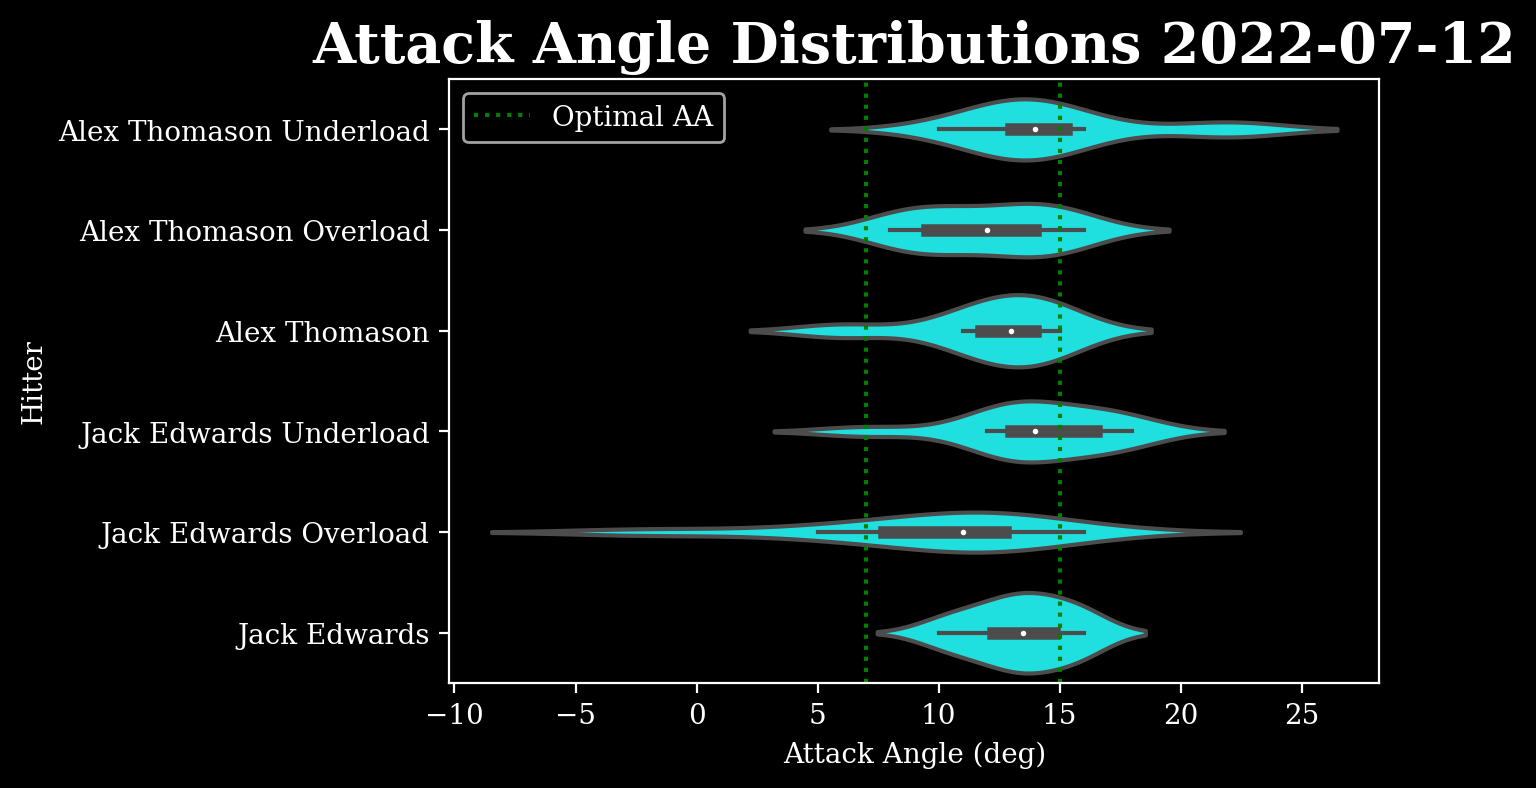

In [ ]:
plt.title(f'Attack Angle Distributions {date}', fontsize=20, fontweight='bold')
sns.violinplot(x='Attack Angle (deg)',y='Hitter',data=blast_session,color='cyan')
plt.axvline(x=7,color='green',linestyle=':',label='Optimal AA')
plt.axvline(x=15,color='green',linestyle=':')
plt.legend(loc='upper left')
plt.savefig(f'{plotsDir}/AADistributions.png',bbox_inches='tight')
plt.show()

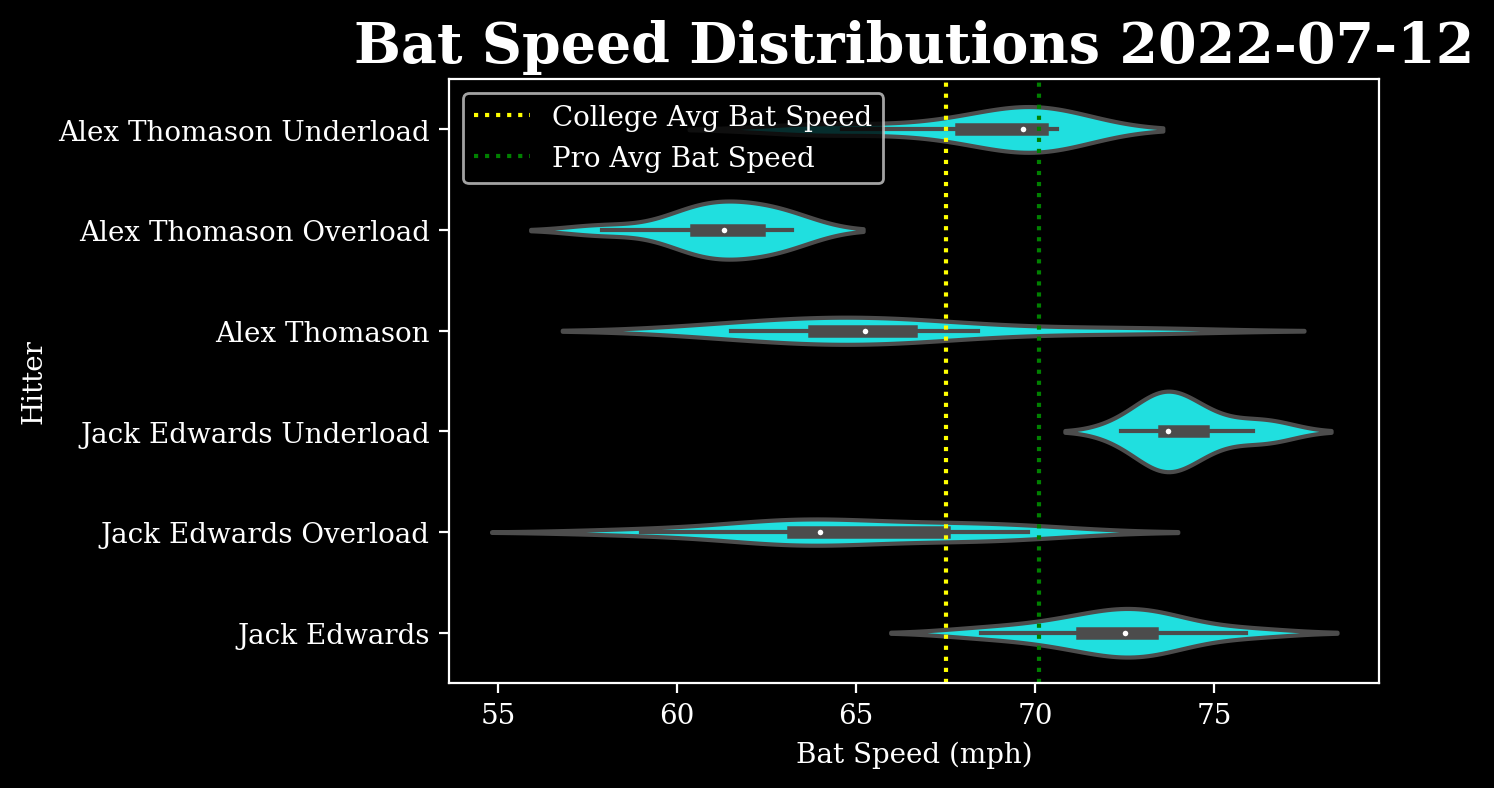

In [ ]:
plt.title(f'Bat Speed Distributions {date}', fontsize=20, fontweight='bold')
sns.violinplot(x='Bat Speed (mph)',y='Hitter',data=blast_session,color='cyan')
plt.axvline(x=67.5,color='yellow',linestyle=':',label='College Avg Bat Speed')
plt.axvline(x=70.1,color='green',linestyle=':',label='Pro Avg Bat Speed')
plt.legend(loc='upper left')
plt.savefig(f'{plotsDir}/DistBaseline.png',bbox_inches='tight')
plt.show()

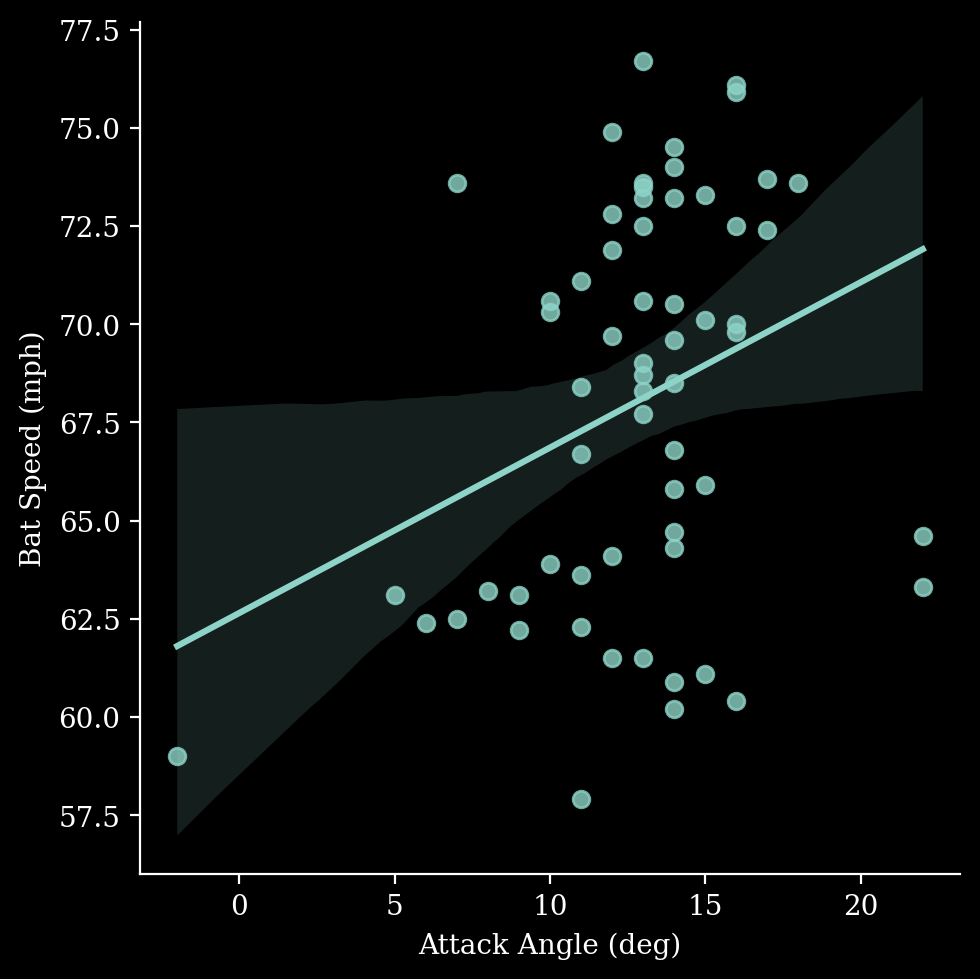

In [ ]:
from seaborn.regression import lmplot
sns.lmplot(x='Attack Angle (deg)',y='Bat Speed (mph)',data=blast_session)

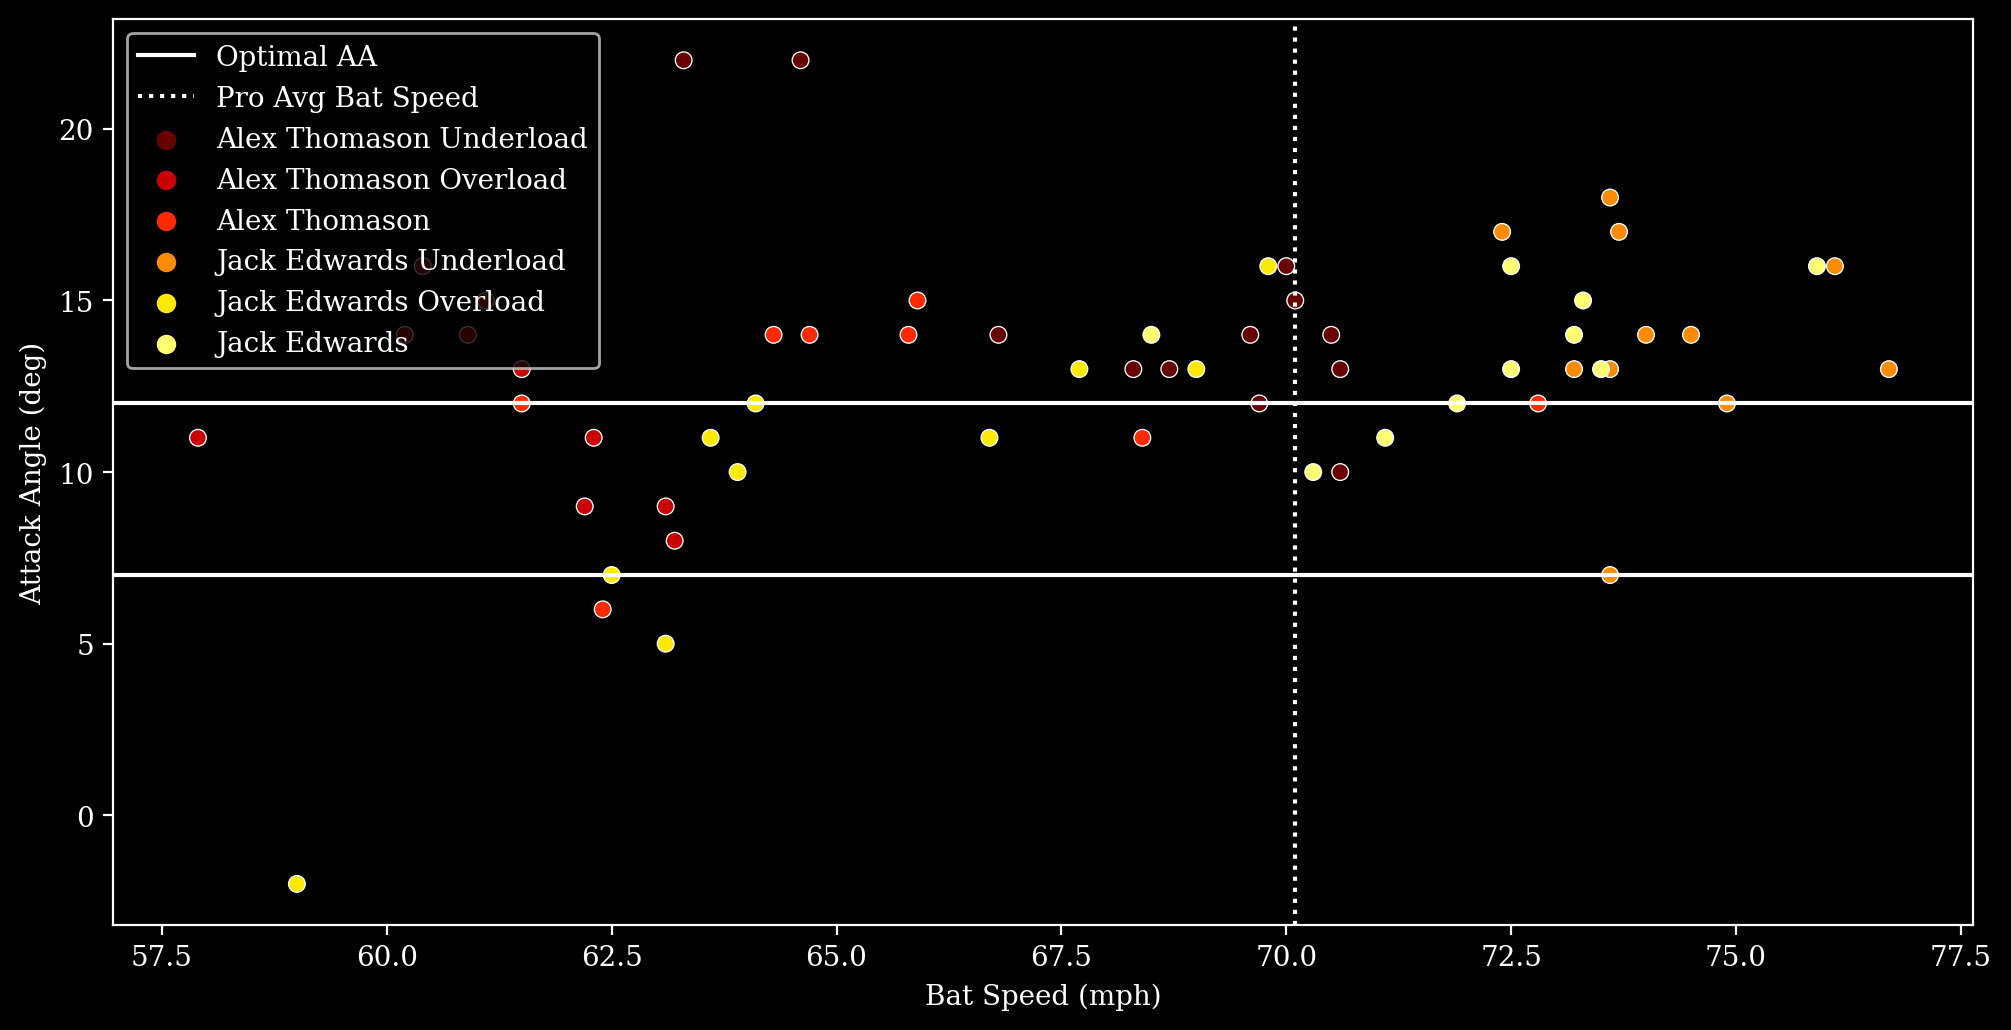

In [ ]:
plt.rcParams['figure.figsize']=[12,6]

sns.scatterplot(x='Bat Speed (mph)',y='Attack Angle (deg)',hue='Hitter',data=blast_session,palette='hot')
x=plt.axhline(y=7, xmin=0.0, xmax=1.0, color='white')
x1=plt.axhline(y=12, xmin=0.0, xmax=1.0, color='white',label='Optimal AA')
y=plt.axvline(x=70.1,color='white',linestyle=':',label='Pro Avg Bat Speed')
plt.legend(loc='upper left')

In [ ]:
blast_session.columns

Index(['Date', 'Hitter', 'Handedness', 'Swing Details', 'Plane Score',
       'Connection Score', 'Rotation Score', 'Bat Speed (mph)',
       'Rotational Acceleration (g)', 'On Plane Efficiency (%)',
       'Attack Angle (deg)', 'Early Connection (deg)',
       'Connection at Impact (deg)', 'Vertical Bat Angle (deg)', 'Power (kW)',
       'Time to Contact (sec)', 'Peak Hand Speed (mph)'],
      dtype='object')

In [ ]:
blast_report_df.to_csv(f'{jackDir}/JackEdwardsBlastReport{date}.csv')
blast_report_df.to_csv(f'{alexDir}/AlexThomasonBlastReport{date}.csv')